<a href="https://colab.research.google.com/github/Viswanathan25/Retail_sales_final-Project/blob/main/F_Handling_Missingvalues.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Handling Missing values**

In [ ]:
#Required libaires
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Final_project/merged_datasets.csv')

**Checking null values**

In [ ]:
df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales    129909
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       271074
MarkDown2       343582
MarkDown3       296860
MarkDown4       302830
MarkDown5       270138
CPI              43303
Unemployment     43303
Day                  0
Month                0
Year                 0
Type                 0
Size                 0
dtype: int64

***Cleaning the null-Values using algoritham***

In [ ]:
df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Day', 'Month', 'Year', 'Type',
       'Size'],
      dtype='object')

In [ ]:
df = df[['Day','Month','Year','Store','Dept','Type','IsHoliday','Weekly_Sales','Size','Temperature',
       'Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4',
       'MarkDown5','CPI','Unemployment']]

In [ ]:
df.columns

Index(['Day', 'Month', 'Year', 'Store', 'Dept', 'Type', 'IsHoliday',
       'Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1',
       'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment'],
      dtype='object')

In [ ]:
df

,Day,Month,Year,Store,Dept,Type,IsHoliday,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,5,2,2010,1,1,1,0,24924.50,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,5,2,2010,1,2,1,0,50605.27,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,5,2,2010,1,3,1,0,13740.12,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,5,2,2010,1,4,1,0,39954.04,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,5,2,2010,1,5,1,0,32229.38,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,0,NaN,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551475,26,7,2013,45,95,2,0,NaN,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551476,26,7,2013,45,96,2,0,NaN,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551477,26,7,2013,45,97,2,0,NaN,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN


# **Weekly sales**

In [ ]:
weekly_sales = df.drop(['Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4',
       'MarkDown5','CPI','Unemployment'],axis=1)

In [ ]:
weekly_sales

,Day,Month,Year,Store,Dept,Type,IsHoliday,Weekly_Sales,Size
0,5,2,2010,1,1,1,0,24924.50,151315
1,5,2,2010,1,2,1,0,50605.27,151315
2,5,2,2010,1,3,1,0,13740.12,151315
3,5,2,2010,1,4,1,0,39954.04,151315
4,5,2,2010,1,5,1,0,32229.38,151315
...,...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,0,NaN,118221
551475,26,7,2013,45,95,2,0,NaN,118221
551476,26,7,2013,45,96,2,0,NaN,118221
551477,26,7,2013,45,97,2,0,NaN,118221


In [ ]:
weekly_sales['Weekly_Sales'].min(),weekly_sales['Weekly_Sales'].max()

(-4988.94, 693099.36)

In [ ]:
#less than 1 make it as None
weekly_sales['Weekly_Sales'] = weekly_sales['Weekly_Sales'].apply(lambda x:None if x<1 else x)

In [ ]:
weekly_sales['Weekly_Sales'].min(),weekly_sales['Weekly_Sales'].max()

(1.0, 693099.36)

In [ ]:
weekly_sales.isnull().sum()

Day                  0
Month                0
Year                 0
Store                0
Dept                 0
Type                 0
IsHoliday            0
Weekly_Sales    131915
Size                 0
dtype: int64

In [ ]:
weekly_null = weekly_sales.dropna()
weekly_null

,Day,Month,Year,Store,Dept,Type,IsHoliday,Weekly_Sales,Size
0,5,2,2010,1,1,1,0,24924.50,151315
1,5,2,2010,1,2,1,0,50605.27,151315
2,5,2,2010,1,3,1,0,13740.12,151315
3,5,2,2010,1,4,1,0,39954.04,151315
4,5,2,2010,1,5,1,0,32229.38,151315
...,...,...,...,...,...,...,...,...,...
421565,26,10,2012,45,93,2,0,2487.80,118221
421566,26,10,2012,45,94,2,0,5203.31,118221
421567,26,10,2012,45,95,2,0,56017.47,118221
421568,26,10,2012,45,97,2,0,6817.48,118221


In [ ]:
x = weekly_null.drop('Weekly_Sales',axis=1)
y = weekly_null['Weekly_Sales']

In [ ]:
x.shape,y.shape

((421570, 8), (421570,))

***Selecting algorithm***

In [ ]:
def model_regression(xtrain,xtest,ytrain,ytest,algorithm):

  for i in algorithm:
    model = i().fit(xtrain,ytrain)

    #predict for accuracy
    y_train_pred = model.predict(xtrain)

    y_test_pred = model.predict(xtest)

    #r2score prection
    r2_train = r2_score(ytrain,y_train_pred)

    r2_test = r2_score(ytest,y_test_pred)

    data = {'Algorthim':i.__name__, 'Training_r2_score':r2_train, 'Testing_r2_score':r2_test}

    print(data)

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)


In [ ]:
model_regression(xtrain,xtest,ytrain,ytest,[DecisionTreeRegressor,ExtraTreeRegressor,RandomForestRegressor,GradientBoostingRegressor,XGBRegressor])

{'Algorthim': 'DecisionTreeRegressor', 'Training_r2_score': 1.0, 'Testing_r2_score': 0.9625329234084824}
{'Algorthim': 'ExtraTreeRegressor', 'Training_r2_score': 1.0, 'Testing_r2_score': 0.945399580777313}
{'Algorthim': 'RandomForestRegressor', 'Training_r2_score': 0.9972861905699997, 'Testing_r2_score': 0.9744750114248171}
{'Algorthim': 'GradientBoostingRegressor', 'Training_r2_score': 0.7349979576196761, 'Testing_r2_score': 0.7223904635330881}
{'Algorthim': 'XGBRegressor', 'Training_r2_score': 0.9506715724848358, 'Testing_r2_score': 0.9428553636502516}


**Here We choose Randomforest**

In [ ]:
weekly_sales_null = weekly_sales[weekly_sales.isnull().any(axis=1)]
weekly_sales_null.to_csv('weekly_sales_null.csv',index=False)
weekly_sales_nn = weekly_sales.dropna()
x = weekly_sales_nn.drop('Weekly_Sales',axis=1)
y = weekly_sales_nn['Weekly_Sales']
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [ ]:
model_regression(xtrain,xtest,ytrain,ytest,[RandomForestRegressor])

{'Algorthim': 'RandomForestRegressor', 'Training_r2_score': 0.9971112611606745, 'Testing_r2_score': 0.9798301881259648}


In [ ]:
weekly_sales_nn

,Day,Month,Year,Store,Dept,Type,IsHoliday,Weekly_Sales,Size
0,5,2,2010,1,1,1,0,24924.50,151315
1,5,2,2010,1,2,1,0,50605.27,151315
2,5,2,2010,1,3,1,0,13740.12,151315
3,5,2,2010,1,4,1,0,39954.04,151315
4,5,2,2010,1,5,1,0,32229.38,151315
...,...,...,...,...,...,...,...,...,...
421565,26,10,2012,45,93,2,0,2487.80,118221
421566,26,10,2012,45,94,2,0,5203.31,118221
421567,26,10,2012,45,95,2,0,56017.47,118221
421568,26,10,2012,45,97,2,0,6817.48,118221


In [ ]:
model = RandomForestRegressor().fit(xtrain,ytrain)

null_df = pd.read_csv('/content/weekly_sales_null.csv')

predicted_ws = model.predict(null_df.drop('Weekly_Sales',axis=1))

null_df.drop('Weekly_Sales',axis=1,inplace=True)

null_df['Weekly_Sales'] = predicted_ws

null_df

,Day,Month,Year,Store,Dept,Type,IsHoliday,Size,Weekly_Sales
0,5,2,2010,6,47,1,0,202505,94.5488
1,5,2,2010,9,49,2,0,125833,38.5617
2,5,2,2010,11,19,1,0,207499,100.4995
3,5,2,2010,15,80,2,0,123737,48.5673
4,5,2,2010,20,19,1,0,203742,201.7314
...,...,...,...,...,...,...,...,...,...
131910,26,7,2013,45,94,2,0,118221,3595.6713
131911,26,7,2013,45,95,2,0,118221,57110.5000
131912,26,7,2013,45,96,2,0,118221,189.0550
131913,26,7,2013,45,97,2,0,118221,6751.9026


In [ ]:
result = pd.concat([weekly_sales_nn,null_df],axis=0,ignore_index = True)
result

,Day,Month,Year,Store,Dept,Type,IsHoliday,Weekly_Sales,Size
0,5,2,2010,1,1,1,0,24924.5000,151315
1,5,2,2010,1,2,1,0,50605.2700,151315
2,5,2,2010,1,3,1,0,13740.1200,151315
3,5,2,2010,1,4,1,0,39954.0400,151315
4,5,2,2010,1,5,1,0,32229.3800,151315
...,...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,0,3595.6713,118221
551475,26,7,2013,45,95,2,0,57110.5000,118221
551476,26,7,2013,45,96,2,0,189.0550,118221
551477,26,7,2013,45,97,2,0,6751.9026,118221


In [ ]:
merge_columns = ['Day','Month','Year','Store','Dept','Type','IsHoliday']

md = df.merge(result, on=merge_columns, how='left')

md

,Day,Month,Year,Store,Dept,Type,IsHoliday,Weekly_Sales_x,Size_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Weekly_Sales_y,Size_y
0,5,2,2010,1,1,1,0,24924.50,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,24924.5000,151315
1,5,2,2010,1,2,1,0,50605.27,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,50605.2700,151315
2,5,2,2010,1,3,1,0,13740.12,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,13740.1200,151315
3,5,2,2010,1,4,1,0,39954.04,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,39954.0400,151315
4,5,2,2010,1,5,1,0,32229.38,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,32229.3800,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,0,NaN,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,3595.6713,118221
551475,26,7,2013,45,95,2,0,NaN,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,57110.5000,118221
551476,26,7,2013,45,96,2,0,NaN,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,189.0550,118221
551477,26,7,2013,45,97,2,0,NaN,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,6751.9026,118221


In [ ]:
df['Weekly_Sales'] = md['Weekly_Sales_y']

print(df.isnull().sum())

Day                  0
Month                0
Year                 0
Store                0
Dept                 0
Type                 0
IsHoliday            0
Weekly_Sales         0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       271074
MarkDown2       343582
MarkDown3       296860
MarkDown4       302830
MarkDown5       270138
CPI              43303
Unemployment     43303
dtype: int64


In [ ]:
df

,Day,Month,Year,Store,Dept,Type,IsHoliday,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,5,2,2010,1,1,1,0,24924.5000,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,5,2,2010,1,2,1,0,50605.2700,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,5,2,2010,1,3,1,0,13740.1200,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,5,2,2010,1,4,1,0,39954.0400,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,5,2,2010,1,5,1,0,32229.3800,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,0,3595.6713,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551475,26,7,2013,45,95,2,0,57110.5000,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551476,26,7,2013,45,96,2,0,189.0550,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551477,26,7,2013,45,97,2,0,6751.9026,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN


In [ ]:
df['Weekly_Sales'].min(),df['Weekly_Sales'].max()

(1.0, 693099.36)

# **Markdown 1**

In [ ]:
mark1 = df.drop(['Weekly_Sales','Size','Temperature','Fuel_Price','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment'],axis=1)
mark1

,Day,Month,Year,Store,Dept,Type,IsHoliday,MarkDown1
0,5,2,2010,1,1,1,0,NaN
1,5,2,2010,1,2,1,0,NaN
2,5,2,2010,1,3,1,0,NaN
3,5,2,2010,1,4,1,0,NaN
4,5,2,2010,1,5,1,0,NaN
...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,0,212.02
551475,26,7,2013,45,95,2,0,212.02
551476,26,7,2013,45,96,2,0,212.02
551477,26,7,2013,45,97,2,0,212.02


In [ ]:
mark1.isnull().sum()

Day               0
Month             0
Year              0
Store             0
Dept              0
Type              0
IsHoliday         0
MarkDown1    271074
dtype: int64

In [ ]:
#Null values
mark1_null = mark1[mark1.isnull().any(axis=1)]
mark1_null.to_csv('mark1_null.csv',index=False)

In [ ]:
mark1_null.isnull().sum()

Day               0
Month             0
Year              0
Store             0
Dept              0
Type              0
IsHoliday         0
MarkDown1    271074
dtype: int64

In [ ]:
mark1_null

,Day,Month,Year,Store,Dept,Type,IsHoliday,MarkDown1
0,5,2,2010,1,1,1,0,NaN
1,5,2,2010,1,2,1,0,NaN
2,5,2,2010,1,3,1,0,NaN
3,5,2,2010,1,4,1,0,NaN
4,5,2,2010,1,5,1,0,NaN
...,...,...,...,...,...,...,...,...
551277,26,7,2013,42,94,3,0,NaN
551278,26,7,2013,42,95,3,0,NaN
551279,26,7,2013,42,96,3,0,NaN
551280,26,7,2013,42,97,3,0,NaN


**Non Null values**

In [ ]:
mark1_nn = mark1.dropna()
mark1_nn

,Day,Month,Year,Store,Dept,Type,IsHoliday,MarkDown1
270138,11,11,2011,1,1,1,0,10382.90
270139,11,11,2011,1,2,1,0,10382.90
270140,11,11,2011,1,3,1,0,10382.90
270141,11,11,2011,1,4,1,0,10382.90
270142,11,11,2011,1,5,1,0,10382.90
...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,0,212.02
551475,26,7,2013,45,95,2,0,212.02
551476,26,7,2013,45,96,2,0,212.02
551477,26,7,2013,45,97,2,0,212.02


In [ ]:
x = mark1_nn.drop('MarkDown1',axis=1)
y = mark1_nn['MarkDown1']

In [ ]:
x.shape,y.shape

((280405, 7), (280405,))

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [ ]:
model_regression(xtrain,xtest,ytrain,ytest,[RandomForestRegressor])

{'Algorthim': 'RandomForestRegressor', 'Training_r2_score': 0.9999956139674553, 'Testing_r2_score': 0.9999646659861415}


In [ ]:
model = RandomForestRegressor().fit(xtrain,ytrain)

null_df = pd.read_csv('/content/mark1_null.csv')

predicted_mark1 = model.predict(null_df.drop('MarkDown1',axis=1))

result = pd.concat([mark1_nn,null_df],axis=0,ignore_index=True)

In [ ]:
null_df.drop('MarkDown1',axis=1,inplace=True)

In [ ]:
null_df['MarkDown1'] = predicted_mark1

In [ ]:
mark1_nn

,Day,Month,Year,Store,Dept,Type,IsHoliday,MarkDown1
270138,11,11,2011,1,1,1,0,10382.90
270139,11,11,2011,1,2,1,0,10382.90
270140,11,11,2011,1,3,1,0,10382.90
270141,11,11,2011,1,4,1,0,10382.90
270142,11,11,2011,1,5,1,0,10382.90
...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,0,212.02
551475,26,7,2013,45,95,2,0,212.02
551476,26,7,2013,45,96,2,0,212.02
551477,26,7,2013,45,97,2,0,212.02


In [ ]:
null_df

,Day,Month,Year,Store,Dept,Type,IsHoliday,MarkDown1
0,5,2,2010,1,1,1,0,6375.9129
1,5,2,2010,1,2,1,0,6375.9129
2,5,2,2010,1,3,1,0,6375.9129
3,5,2,2010,1,4,1,0,6375.9129
4,5,2,2010,1,5,1,0,6375.9129
...,...,...,...,...,...,...,...,...
271069,26,7,2013,42,94,3,0,55.1482
271070,26,7,2013,42,95,3,0,55.1482
271071,26,7,2013,42,96,3,0,55.1482
271072,26,7,2013,42,97,3,0,55.1482


In [ ]:
result = pd.concat([mark1_nn,null_df],axis=0,ignore_index=True)
result

,Day,Month,Year,Store,Dept,Type,IsHoliday,MarkDown1
0,11,11,2011,1,1,1,0,10382.9000
1,11,11,2011,1,2,1,0,10382.9000
2,11,11,2011,1,3,1,0,10382.9000
3,11,11,2011,1,4,1,0,10382.9000
4,11,11,2011,1,5,1,0,10382.9000
...,...,...,...,...,...,...,...,...
551474,26,7,2013,42,94,3,0,55.1482
551475,26,7,2013,42,95,3,0,55.1482
551476,26,7,2013,42,96,3,0,55.1482
551477,26,7,2013,42,97,3,0,55.1482


In [ ]:
df

,Day,Month,Year,Store,Dept,Type,IsHoliday,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,5,2,2010,1,1,1,0,24924.5000,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,5,2,2010,1,2,1,0,50605.2700,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,5,2,2010,1,3,1,0,13740.1200,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,5,2,2010,1,4,1,0,39954.0400,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,5,2,2010,1,5,1,0,32229.3800,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,0,3595.6713,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551475,26,7,2013,45,95,2,0,57110.5000,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551476,26,7,2013,45,96,2,0,189.0550,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551477,26,7,2013,45,97,2,0,6751.9026,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN


In [ ]:
merge_columns = ['Day','Month','Year','Store','Dept','Type','IsHoliday']

md = df.merge(result, on=merge_columns, how='left')

md

,Day,Month,Year,Store,Dept,Type,IsHoliday,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1_x,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,MarkDown1_y
0,5,2,2010,1,1,1,0,24924.5000,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,6375.9129
1,5,2,2010,1,2,1,0,50605.2700,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,6375.9129
2,5,2,2010,1,3,1,0,13740.1200,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,6375.9129
3,5,2,2010,1,4,1,0,39954.0400,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,6375.9129
4,5,2,2010,1,5,1,0,32229.3800,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,6375.9129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,0,3595.6713,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,212.0200
551475,26,7,2013,45,95,2,0,57110.5000,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,212.0200
551476,26,7,2013,45,96,2,0,189.0550,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,212.0200
551477,26,7,2013,45,97,2,0,6751.9026,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,212.0200


In [ ]:
df['MarkDown1'] = md['MarkDown1_y']
print(df.isnull().sum())

Day                  0
Month                0
Year                 0
Store                0
Dept                 0
Type                 0
IsHoliday            0
Weekly_Sales         0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1            0
MarkDown2       343582
MarkDown3       296860
MarkDown4       302830
MarkDown5       270138
CPI              43303
Unemployment     43303
dtype: int64


In [ ]:
df

,Day,Month,Year,Store,Dept,Type,IsHoliday,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,5,2,2010,1,1,1,0,24924.5000,151315,42.31,2.572,6375.9129,NaN,NaN,NaN,NaN,211.096358,8.106
1,5,2,2010,1,2,1,0,50605.2700,151315,42.31,2.572,6375.9129,NaN,NaN,NaN,NaN,211.096358,8.106
2,5,2,2010,1,3,1,0,13740.1200,151315,42.31,2.572,6375.9129,NaN,NaN,NaN,NaN,211.096358,8.106
3,5,2,2010,1,4,1,0,39954.0400,151315,42.31,2.572,6375.9129,NaN,NaN,NaN,NaN,211.096358,8.106
4,5,2,2010,1,5,1,0,32229.3800,151315,42.31,2.572,6375.9129,NaN,NaN,NaN,NaN,211.096358,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,0,3595.6713,118221,76.06,3.804,212.0200,851.73,2.06,10.88,1864.57,NaN,NaN
551475,26,7,2013,45,95,2,0,57110.5000,118221,76.06,3.804,212.0200,851.73,2.06,10.88,1864.57,NaN,NaN
551476,26,7,2013,45,96,2,0,189.0550,118221,76.06,3.804,212.0200,851.73,2.06,10.88,1864.57,NaN,NaN
551477,26,7,2013,45,97,2,0,6751.9026,118221,76.06,3.804,212.0200,851.73,2.06,10.88,1864.57,NaN,NaN


## **Markdown2**

In [ ]:
mark2 = df.drop(['Weekly_Sales','Size','Temperature','Fuel_Price','MarkDown1','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment'],axis=1)
mark2

,Day,Month,Year,Store,Dept,Type,IsHoliday,MarkDown2
0,5,2,2010,1,1,1,0,NaN
1,5,2,2010,1,2,1,0,NaN
2,5,2,2010,1,3,1,0,NaN
3,5,2,2010,1,4,1,0,NaN
4,5,2,2010,1,5,1,0,NaN
...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,0,851.73
551475,26,7,2013,45,95,2,0,851.73
551476,26,7,2013,45,96,2,0,851.73
551477,26,7,2013,45,97,2,0,851.73


In [ ]:
mark2_null = mark2[mark2.isnull().any(axis=1)]

mark2_null.to_csv('mark2_null.csv',index=False)



In [ ]:
mark2_null

,Day,Month,Year,Store,Dept,Type,IsHoliday,MarkDown2
0,5,2,2010,1,1,1,0,NaN
1,5,2,2010,1,2,1,0,NaN
2,5,2,2010,1,3,1,0,NaN
3,5,2,2010,1,4,1,0,NaN
4,5,2,2010,1,5,1,0,NaN
...,...,...,...,...,...,...,...,...
551400,26,7,2013,44,95,3,0,NaN
551401,26,7,2013,44,96,3,0,NaN
551402,26,7,2013,44,97,3,0,NaN
551403,26,7,2013,44,98,3,0,NaN


In [ ]:
mark2_nn = mark2.dropna()

x = mark2_nn.drop('MarkDown2',axis=1)

y = mark2_nn['MarkDown2']

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [ ]:
mark2_nn

,Day,Month,Year,Store,Dept,Type,IsHoliday,MarkDown2
270138,11,11,2011,1,1,1,0,6115.67
270139,11,11,2011,1,2,1,0,6115.67
270140,11,11,2011,1,3,1,0,6115.67
270141,11,11,2011,1,4,1,0,6115.67
270142,11,11,2011,1,5,1,0,6115.67
...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,0,851.73
551475,26,7,2013,45,95,2,0,851.73
551476,26,7,2013,45,96,2,0,851.73
551477,26,7,2013,45,97,2,0,851.73


In [ ]:
x.shape,y.shape

((207897, 7), (207897,))

In [ ]:
model_regression(xtrain,xtest,ytrain,ytest,[RandomForestRegressor])

{'Algorthim': 'RandomForestRegressor', 'Training_r2_score': 0.9999999770971816, 'Testing_r2_score': 0.9999999186130462}


In [ ]:
model = RandomForestRegressor().fit(xtrain,ytrain)

null_df = pd.read_csv('/content/mark2_null.csv')

Predicted_mark2 = model.predict(null_df.drop('MarkDown2',axis=1))

null_df.drop('MarkDown2',axis=1,inplace=True)

null_df['MarkDown2'] = Predicted_mark2

In [ ]:
null_df

,Day,Month,Year,Store,Dept,Type,IsHoliday,MarkDown2
0,5,2,2010,1,1,1,0,3579.2100
1,5,2,2010,1,2,1,0,3579.2100
2,5,2,2010,1,3,1,0,3579.2100
3,5,2,2010,1,4,1,0,3579.2100
4,5,2,2010,1,5,1,0,3579.2100
...,...,...,...,...,...,...,...,...
343577,26,7,2013,44,95,3,0,608.1677
343578,26,7,2013,44,96,3,0,608.1677
343579,26,7,2013,44,97,3,0,608.1677
343580,26,7,2013,44,98,3,0,608.1677


In [ ]:
result = pd.concat([mark2_nn,null_df],axis =0,ignore_index=True)
result

,Day,Month,Year,Store,Dept,Type,IsHoliday,MarkDown2
0,11,11,2011,1,1,1,0,6115.6700
1,11,11,2011,1,2,1,0,6115.6700
2,11,11,2011,1,3,1,0,6115.6700
3,11,11,2011,1,4,1,0,6115.6700
4,11,11,2011,1,5,1,0,6115.6700
...,...,...,...,...,...,...,...,...
551474,26,7,2013,44,95,3,0,608.1677
551475,26,7,2013,44,96,3,0,608.1677
551476,26,7,2013,44,97,3,0,608.1677
551477,26,7,2013,44,98,3,0,608.1677


In [ ]:
merge_columns = ['Day','Month','Year','Store','Dept','Type','IsHoliday']

md = df.merge(result, on=merge_columns, how='left')

md

,Day,Month,Year,Store,Dept,Type,IsHoliday,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2_x,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,MarkDown2_y
0,5,2,2010,1,1,1,0,24924.5000,151315,42.31,2.572,6375.9129,NaN,NaN,NaN,NaN,211.096358,8.106,3579.21
1,5,2,2010,1,2,1,0,50605.2700,151315,42.31,2.572,6375.9129,NaN,NaN,NaN,NaN,211.096358,8.106,3579.21
2,5,2,2010,1,3,1,0,13740.1200,151315,42.31,2.572,6375.9129,NaN,NaN,NaN,NaN,211.096358,8.106,3579.21
3,5,2,2010,1,4,1,0,39954.0400,151315,42.31,2.572,6375.9129,NaN,NaN,NaN,NaN,211.096358,8.106,3579.21
4,5,2,2010,1,5,1,0,32229.3800,151315,42.31,2.572,6375.9129,NaN,NaN,NaN,NaN,211.096358,8.106,3579.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,0,3595.6713,118221,76.06,3.804,212.0200,851.73,2.06,10.88,1864.57,NaN,NaN,851.73
551475,26,7,2013,45,95,2,0,57110.5000,118221,76.06,3.804,212.0200,851.73,2.06,10.88,1864.57,NaN,NaN,851.73
551476,26,7,2013,45,96,2,0,189.0550,118221,76.06,3.804,212.0200,851.73,2.06,10.88,1864.57,NaN,NaN,851.73
551477,26,7,2013,45,97,2,0,6751.9026,118221,76.06,3.804,212.0200,851.73,2.06,10.88,1864.57,NaN,NaN,851.73


In [ ]:
df['MarkDown2'] = md['MarkDown2_y']
print(df.isnull().sum())

Day                  0
Month                0
Year                 0
Store                0
Dept                 0
Type                 0
IsHoliday            0
Weekly_Sales         0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1            0
MarkDown2            0
MarkDown3       296860
MarkDown4       302830
MarkDown5       270138
CPI              43303
Unemployment     43303
dtype: int64


# **MarkDown3**

In [ ]:
mark3 = df.drop(['Weekly_Sales','Size','Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown4','MarkDown5','CPI','Unemployment'],axis=1)
mark3

,Day,Month,Year,Store,Dept,Type,IsHoliday,MarkDown3
0,5,2,2010,1,1,1,0,NaN
1,5,2,2010,1,2,1,0,NaN
2,5,2,2010,1,3,1,0,NaN
3,5,2,2010,1,4,1,0,NaN
4,5,2,2010,1,5,1,0,NaN
...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,0,2.06
551475,26,7,2013,45,95,2,0,2.06
551476,26,7,2013,45,96,2,0,2.06
551477,26,7,2013,45,97,2,0,2.06


In [ ]:
mark3_null = mark3[mark3.isnull().any(axis=1)]

mark3.to_csv('mark3.csv',index=False)

mark3_nn = mark3.dropna()

x = mark3_nn.drop('MarkDown3',axis=1)

y = mark3_nn['MarkDown3']

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [ ]:
model_regression(xtrain,xtest,ytrain,ytest,[RandomForestRegressor])

{'Algorthim': 'RandomForestRegressor', 'Training_r2_score': 0.9999999999028636, 'Testing_r2_score': 0.9999999991772364}


In [ ]:
model = RandomForestRegressor().fit(xtrain,ytrain)

null_df = pd.read_csv('/content/mark3.csv')

predicted_mark3 = model.predict(null_df.drop('MarkDown3',axis=1))

null_df.drop('MarkDown3',axis=1,inplace=True)

null_df['MarkDown3'] = predicted_mark3


In [ ]:
mark3_nn

,Day,Month,Year,Store,Dept,Type,IsHoliday,MarkDown3
270138,11,11,2011,1,1,1,0,215.07
270139,11,11,2011,1,2,1,0,215.07
270140,11,11,2011,1,3,1,0,215.07
270141,11,11,2011,1,4,1,0,215.07
270142,11,11,2011,1,5,1,0,215.07
...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,0,2.06
551475,26,7,2013,45,95,2,0,2.06
551476,26,7,2013,45,96,2,0,2.06
551477,26,7,2013,45,97,2,0,2.06


In [ ]:
null_df

,Day,Month,Year,Store,Dept,Type,IsHoliday,MarkDown3
0,5,2,2010,1,1,1,0,137.9309
1,5,2,2010,1,2,1,0,137.9309
2,5,2,2010,1,3,1,0,137.9309
3,5,2,2010,1,4,1,0,137.9309
4,5,2,2010,1,5,1,0,137.9309
...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,0,2.0600
551475,26,7,2013,45,95,2,0,2.0600
551476,26,7,2013,45,96,2,0,2.0600
551477,26,7,2013,45,97,2,0,2.0600


In [ ]:
result = pd.concat([mark3_nn, null_df], axis=0,ignore_index=True)

In [ ]:
merge_columns =['Day','Month','Year','Store','Dept','Type','IsHoliday']

md = df.merge(result, on=merge_columns, how='left')

md

,Day,Month,Year,Store,Dept,Type,IsHoliday,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3_x,MarkDown4,MarkDown5,CPI,Unemployment,MarkDown3_y
0,5,2,2010,1,1,1,0,24924.5000,151315,42.31,2.572,6375.9129,3579.21,NaN,NaN,NaN,211.096358,8.106,137.9309
1,5,2,2010,1,2,1,0,50605.2700,151315,42.31,2.572,6375.9129,3579.21,NaN,NaN,NaN,211.096358,8.106,137.9309
2,5,2,2010,1,3,1,0,13740.1200,151315,42.31,2.572,6375.9129,3579.21,NaN,NaN,NaN,211.096358,8.106,137.9309
3,5,2,2010,1,4,1,0,39954.0400,151315,42.31,2.572,6375.9129,3579.21,NaN,NaN,NaN,211.096358,8.106,137.9309
4,5,2,2010,1,5,1,0,32229.3800,151315,42.31,2.572,6375.9129,3579.21,NaN,NaN,NaN,211.096358,8.106,137.9309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806093,26,7,2013,45,96,2,0,189.0550,118221,76.06,3.804,212.0200,851.73,2.06,10.88,1864.57,NaN,NaN,2.0600
806094,26,7,2013,45,97,2,0,6751.9026,118221,76.06,3.804,212.0200,851.73,2.06,10.88,1864.57,NaN,NaN,2.0600
806095,26,7,2013,45,97,2,0,6751.9026,118221,76.06,3.804,212.0200,851.73,2.06,10.88,1864.57,NaN,NaN,2.0600
806096,26,7,2013,45,98,2,0,724.3577,118221,76.06,3.804,212.0200,851.73,2.06,10.88,1864.57,NaN,NaN,2.0600


In [ ]:
df['MarkDown3'] = md['MarkDown3_y']

print(df.isnull().sum())

Day                  0
Month                0
Year                 0
Store                0
Dept                 0
Type                 0
IsHoliday            0
Weekly_Sales         0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1            0
MarkDown2            0
MarkDown3            0
MarkDown4       302830
MarkDown5       270138
CPI              43303
Unemployment     43303
dtype: int64


## **MarkDown4**

In [ ]:
mark4 = df.drop(['Weekly_Sales','Size','Temperature','Fuel_Price','MarkDown1','MarkDown3','MarkDown3','MarkDown5','CPI','Unemployment'],axis=1)
mark4

,Day,Month,Year,Store,Dept,Type,IsHoliday,MarkDown2,MarkDown4
0,5,2,2010,1,1,1,0,3579.21,NaN
1,5,2,2010,1,2,1,0,3579.21,NaN
2,5,2,2010,1,3,1,0,3579.21,NaN
3,5,2,2010,1,4,1,0,3579.21,NaN
4,5,2,2010,1,5,1,0,3579.21,NaN
...,...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,0,851.73,10.88
551475,26,7,2013,45,95,2,0,851.73,10.88
551476,26,7,2013,45,96,2,0,851.73,10.88
551477,26,7,2013,45,97,2,0,851.73,10.88


In [ ]:
mark4_null = mark4[mark4.isnull().any(axis=1)]

mark4_null.to_csv('mark4_null.csv',index=False)

mark4_nn = mark4.dropna()

x = mark4_nn.drop('MarkDown4',axis=1)
y = mark4_nn['MarkDown4']

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [ ]:
mark4_nn

,Day,Month,Year,Store,Dept,Type,IsHoliday,MarkDown2,MarkDown4
270138,11,11,2011,1,1,1,0,6115.67,2406.62
270139,11,11,2011,1,2,1,0,6115.67,2406.62
270140,11,11,2011,1,3,1,0,6115.67,2406.62
270141,11,11,2011,1,4,1,0,6115.67,2406.62
270142,11,11,2011,1,5,1,0,6115.67,2406.62
...,...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,0,851.73,10.88
551475,26,7,2013,45,95,2,0,851.73,10.88
551476,26,7,2013,45,96,2,0,851.73,10.88
551477,26,7,2013,45,97,2,0,851.73,10.88


In [ ]:
model = RandomForestRegressor().fit(xtrain,ytrain)

null_df = pd.read_csv('/content/mark4_null.csv')

# prediction

predicted_mark4 = model.predict(null_df.drop('MarkDown4',axis=1))

null_df.drop('MarkDown4',axis=1,inplace=True)

null_df['MarkDown4'] = predicted_mark4

null_df

,Day,Month,Year,Store,Dept,Type,IsHoliday,MarkDown2,MarkDown4
0,5,2,2010,1,1,1,0,3579.2100,32403.8700
1,5,2,2010,1,2,1,0,3579.2100,32403.8700
2,5,2,2010,1,3,1,0,3579.2100,32403.8700
3,5,2,2010,1,4,1,0,3579.2100,32403.8700
4,5,2,2010,1,5,1,0,3579.2100,32403.8700
...,...,...,...,...,...,...,...,...,...
302825,26,7,2013,44,95,3,0,608.1677,13.4126
302826,26,7,2013,44,96,3,0,608.1677,13.4126
302827,26,7,2013,44,97,3,0,608.1677,13.4126
302828,26,7,2013,44,98,3,0,608.1677,13.4126


In [ ]:
result = pd.concat([mark4_nn, null_df], axis=0,ignore_index=True)

result

,Day,Month,Year,Store,Dept,Type,IsHoliday,MarkDown2,MarkDown4
0,11,11,2011,1,1,1,0,6115.6700,2406.6200
1,11,11,2011,1,2,1,0,6115.6700,2406.6200
2,11,11,2011,1,3,1,0,6115.6700,2406.6200
3,11,11,2011,1,4,1,0,6115.6700,2406.6200
4,11,11,2011,1,5,1,0,6115.6700,2406.6200
...,...,...,...,...,...,...,...,...,...
551474,26,7,2013,44,95,3,0,608.1677,13.4126
551475,26,7,2013,44,96,3,0,608.1677,13.4126
551476,26,7,2013,44,97,3,0,608.1677,13.4126
551477,26,7,2013,44,98,3,0,608.1677,13.4126


In [ ]:
merge_columns =['Day','Month','Year','Store','Dept','Type','IsHoliday']

md = df.merge(result, on=merge_columns, how='left')

md

,Day,Month,Year,Store,Dept,Type,IsHoliday,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2_x,MarkDown3,MarkDown4_x,MarkDown5,CPI,Unemployment,MarkDown2_y,MarkDown4_y
0,5,2,2010,1,1,1,0,24924.5000,151315,42.31,2.572,6375.9129,3579.21,137.9309,NaN,NaN,211.096358,8.106,3579.21,32403.87
1,5,2,2010,1,2,1,0,50605.2700,151315,42.31,2.572,6375.9129,3579.21,137.9309,NaN,NaN,211.096358,8.106,3579.21,32403.87
2,5,2,2010,1,3,1,0,13740.1200,151315,42.31,2.572,6375.9129,3579.21,137.9309,NaN,NaN,211.096358,8.106,3579.21,32403.87
3,5,2,2010,1,4,1,0,39954.0400,151315,42.31,2.572,6375.9129,3579.21,137.9309,NaN,NaN,211.096358,8.106,3579.21,32403.87
4,5,2,2010,1,5,1,0,32229.3800,151315,42.31,2.572,6375.9129,3579.21,137.9309,NaN,NaN,211.096358,8.106,3579.21,32403.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,0,3595.6713,118221,76.06,3.804,212.0200,851.73,4.7000,10.88,1864.57,NaN,NaN,851.73,10.88
551475,26,7,2013,45,95,2,0,57110.5000,118221,76.06,3.804,212.0200,851.73,4.7000,10.88,1864.57,NaN,NaN,851.73,10.88
551476,26,7,2013,45,96,2,0,189.0550,118221,76.06,3.804,212.0200,851.73,4.7000,10.88,1864.57,NaN,NaN,851.73,10.88
551477,26,7,2013,45,97,2,0,6751.9026,118221,76.06,3.804,212.0200,851.73,4.7000,10.88,1864.57,NaN,NaN,851.73,10.88


In [ ]:
df['MarkDown4'] = md['MarkDown4_y']

print(df.isnull().sum())

Day                  0
Month                0
Year                 0
Store                0
Dept                 0
Type                 0
IsHoliday            0
Weekly_Sales         0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1            0
MarkDown2            0
MarkDown3            0
MarkDown4            0
MarkDown5       270138
CPI              43303
Unemployment     43303
dtype: int64


# **Markdown5**

In [ ]:
mark5 = df.drop(['Weekly_Sales','Size','Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','CPI','Unemployment'],axis=1)
mark5

,Day,Month,Year,Store,Dept,Type,IsHoliday,MarkDown5
0,5,2,2010,1,1,1,0,NaN
1,5,2,2010,1,2,1,0,NaN
2,5,2,2010,1,3,1,0,NaN
3,5,2,2010,1,4,1,0,NaN
4,5,2,2010,1,5,1,0,NaN
...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,0,1864.57
551475,26,7,2013,45,95,2,0,1864.57
551476,26,7,2013,45,96,2,0,1864.57
551477,26,7,2013,45,97,2,0,1864.57


In [ ]:
mark5_null = mark5[mark5.isnull().any(axis=1)]

mark5_null.to_csv('mark5_null.csv',index=False)

mark5_nn = mark5.dropna()

x = mark5_nn.drop('MarkDown5',axis=1)
y = mark5_nn['MarkDown5']

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [ ]:
mark5_nn

,Day,Month,Year,Store,Dept,Type,IsHoliday,MarkDown5
270138,11,11,2011,1,1,1,0,6551.42
270139,11,11,2011,1,2,1,0,6551.42
270140,11,11,2011,1,3,1,0,6551.42
270141,11,11,2011,1,4,1,0,6551.42
270142,11,11,2011,1,5,1,0,6551.42
...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,0,1864.57
551475,26,7,2013,45,95,2,0,1864.57
551476,26,7,2013,45,96,2,0,1864.57
551477,26,7,2013,45,97,2,0,1864.57


In [ ]:
model = RandomForestRegressor().fit(xtrain,ytrain)

null_df = pd.read_csv('/content/mark5_null.csv')

# prediction

predicted_mark5 = model.predict(null_df.drop('MarkDown5',axis=1))

null_df.drop('MarkDown5',axis=1,inplace=True)

null_df['MarkDown5'] = predicted_mark5

result = pd.concat([mark5_nn, null_df], axis=0,ignore_index=True)

result

,Day,Month,Year,Store,Dept,Type,IsHoliday,MarkDown5
0,11,11,2011,1,1,1,0,6551.4200
1,11,11,2011,1,2,1,0,6551.4200
2,11,11,2011,1,3,1,0,6551.4200
3,11,11,2011,1,4,1,0,6551.4200
4,11,11,2011,1,5,1,0,6551.4200
...,...,...,...,...,...,...,...,...
551474,4,11,2011,45,93,2,0,5267.3954
551475,4,11,2011,45,94,2,0,5267.3954
551476,4,11,2011,45,95,2,0,5267.3954
551477,4,11,2011,45,97,2,0,5267.3954


In [ ]:
null_df

,Day,Month,Year,Store,Dept,Type,IsHoliday,MarkDown5
0,5,2,2010,1,1,1,0,6965.5160
1,5,2,2010,1,2,1,0,6965.5160
2,5,2,2010,1,3,1,0,6965.5160
3,5,2,2010,1,4,1,0,6965.5160
4,5,2,2010,1,5,1,0,6965.5160
...,...,...,...,...,...,...,...,...
270133,4,11,2011,45,93,2,0,5267.3954
270134,4,11,2011,45,94,2,0,5267.3954
270135,4,11,2011,45,95,2,0,5267.3954
270136,4,11,2011,45,97,2,0,5267.3954


In [ ]:
merge_columns =['Day','Month','Year','Store','Dept','Type','IsHoliday']

md = df.merge(result, on=merge_columns, how='left')

md

,Day,Month,Year,Store,Dept,Type,IsHoliday,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5_x,CPI,Unemployment,MarkDown5_y
0,5,2,2010,1,1,1,0,24924.5000,151315,42.31,2.572,6375.9129,3579.21,137.9309,32403.87,NaN,211.096358,8.106,6965.516
1,5,2,2010,1,2,1,0,50605.2700,151315,42.31,2.572,6375.9129,3579.21,137.9309,32403.87,NaN,211.096358,8.106,6965.516
2,5,2,2010,1,3,1,0,13740.1200,151315,42.31,2.572,6375.9129,3579.21,137.9309,32403.87,NaN,211.096358,8.106,6965.516
3,5,2,2010,1,4,1,0,39954.0400,151315,42.31,2.572,6375.9129,3579.21,137.9309,32403.87,NaN,211.096358,8.106,6965.516
4,5,2,2010,1,5,1,0,32229.3800,151315,42.31,2.572,6375.9129,3579.21,137.9309,32403.87,NaN,211.096358,8.106,6965.516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,0,3595.6713,118221,76.06,3.804,212.0200,851.73,4.7000,10.88,1864.57,NaN,NaN,1864.570
551475,26,7,2013,45,95,2,0,57110.5000,118221,76.06,3.804,212.0200,851.73,4.7000,10.88,1864.57,NaN,NaN,1864.570
551476,26,7,2013,45,96,2,0,189.0550,118221,76.06,3.804,212.0200,851.73,4.7000,10.88,1864.57,NaN,NaN,1864.570
551477,26,7,2013,45,97,2,0,6751.9026,118221,76.06,3.804,212.0200,851.73,4.7000,10.88,1864.57,NaN,NaN,1864.570


In [ ]:
df['MarkDown5'] = md['MarkDown5_y']

print(df.isnull().sum())

Day                 0
Month               0
Year                0
Store               0
Dept                0
Type                0
IsHoliday           0
Weekly_Sales        0
Size                0
Temperature         0
Fuel_Price          0
MarkDown1           0
MarkDown2           0
MarkDown3           0
MarkDown4           0
MarkDown5           0
CPI             43303
Unemployment    43303
dtype: int64


# **CPI**

In [ ]:
cpi = df.drop(['Weekly_Sales','Size','Temperature','Fuel_Price','MarkDown1','MarkDown3','MarkDown4','MarkDown5','Unemployment'],axis=1)
cpi

,Day,Month,Year,Store,Dept,Type,IsHoliday,MarkDown2,CPI
0,5,2,2010,1,1,1,0,3579.21,211.096358
1,5,2,2010,1,2,1,0,3579.21,211.096358
2,5,2,2010,1,3,1,0,3579.21,211.096358
3,5,2,2010,1,4,1,0,3579.21,211.096358
4,5,2,2010,1,5,1,0,3579.21,211.096358
...,...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,0,851.73,NaN
551475,26,7,2013,45,95,2,0,851.73,NaN
551476,26,7,2013,45,96,2,0,851.73,NaN
551477,26,7,2013,45,97,2,0,851.73,NaN


In [ ]:
cpi_null = cpi[cpi.isnull().any(axis=1)]

cpi_null.to_csv('cpi_null.csv',index=False)

cpi_nn = cpi.dropna()

x = cpi_nn.drop('CPI',axis=1)
y = cpi_nn['CPI']

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [ ]:
cpi_nn

,Day,Month,Year,Store,Dept,Type,IsHoliday,MarkDown2,CPI
0,5,2,2010,1,1,1,0,3579.2100,211.096358
1,5,2,2010,1,2,1,0,3579.2100,211.096358
2,5,2,2010,1,3,1,0,3579.2100,211.096358
3,5,2,2010,1,4,1,0,3579.2100,211.096358
4,5,2,2010,1,5,1,0,3579.2100,211.096358
...,...,...,...,...,...,...,...,...,...
508171,26,4,2013,45,94,2,0,34.1219,193.589304
508172,26,4,2013,45,95,2,0,34.1219,193.589304
508173,26,4,2013,45,96,2,0,34.1219,193.589304
508174,26,4,2013,45,97,2,0,34.1219,193.589304


In [ ]:
model_regression(xtrain,xtest,ytrain,ytest,[RandomForestRegressor])

{'Algorthim': 'RandomForestRegressor', 'Training_r2_score': 0.9999999999803382, 'Testing_r2_score': 0.9999999999271222}


In [ ]:
model = RandomForestRegressor().fit(xtrain,ytrain)

null_df = pd.read_csv('/content/cpi_null.csv')

# prediction

predicted_cpi = model.predict(null_df.drop('CPI',axis=1))

null_df.drop('CPI',axis=1,inplace=True)

null_df['CPI'] = predicted_cpi

In [ ]:
null_df

,Day,Month,Year,Store,Dept,Type,IsHoliday,MarkDown2,CPI
0,3,5,2013,1,1,1,0,2.00,225.138384
1,3,5,2013,1,2,1,0,2.00,225.138384
2,3,5,2013,1,3,1,0,2.00,225.138384
3,3,5,2013,1,4,1,0,2.00,225.138384
4,3,5,2013,1,5,1,0,2.00,225.138384
...,...,...,...,...,...,...,...,...,...
43298,26,7,2013,45,94,2,0,851.73,193.589304
43299,26,7,2013,45,95,2,0,851.73,193.589304
43300,26,7,2013,45,96,2,0,851.73,193.589304
43301,26,7,2013,45,97,2,0,851.73,193.589304


In [ ]:
result = pd.concat([cpi_nn, null_df], axis=0,ignore_index=True)

result

,Day,Month,Year,Store,Dept,Type,IsHoliday,MarkDown2,CPI
0,5,2,2010,1,1,1,0,3579.21,211.096358
1,5,2,2010,1,2,1,0,3579.21,211.096358
2,5,2,2010,1,3,1,0,3579.21,211.096358
3,5,2,2010,1,4,1,0,3579.21,211.096358
4,5,2,2010,1,5,1,0,3579.21,211.096358
...,...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,0,851.73,193.589304
551475,26,7,2013,45,95,2,0,851.73,193.589304
551476,26,7,2013,45,96,2,0,851.73,193.589304
551477,26,7,2013,45,97,2,0,851.73,193.589304


In [ ]:
merge_columns =['Day','Month','Year','Store','Dept','Type','IsHoliday']

md = df.merge(result, on=merge_columns, how='left')

md

,Day,Month,Year,Store,Dept,Type,IsHoliday,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2_x,MarkDown3,MarkDown4,MarkDown5,CPI_x,Unemployment,MarkDown2_y,CPI_y
0,5,2,2010,1,1,1,0,24924.5000,151315,42.31,2.572,6375.9129,3579.21,137.9309,32403.87,6965.516,211.096358,8.106,3579.21,211.096358
1,5,2,2010,1,2,1,0,50605.2700,151315,42.31,2.572,6375.9129,3579.21,137.9309,32403.87,6965.516,211.096358,8.106,3579.21,211.096358
2,5,2,2010,1,3,1,0,13740.1200,151315,42.31,2.572,6375.9129,3579.21,137.9309,32403.87,6965.516,211.096358,8.106,3579.21,211.096358
3,5,2,2010,1,4,1,0,39954.0400,151315,42.31,2.572,6375.9129,3579.21,137.9309,32403.87,6965.516,211.096358,8.106,3579.21,211.096358
4,5,2,2010,1,5,1,0,32229.3800,151315,42.31,2.572,6375.9129,3579.21,137.9309,32403.87,6965.516,211.096358,8.106,3579.21,211.096358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,0,3595.6713,118221,76.06,3.804,212.0200,851.73,4.7000,10.88,1864.570,NaN,NaN,851.73,193.589304
551475,26,7,2013,45,95,2,0,57110.5000,118221,76.06,3.804,212.0200,851.73,4.7000,10.88,1864.570,NaN,NaN,851.73,193.589304
551476,26,7,2013,45,96,2,0,189.0550,118221,76.06,3.804,212.0200,851.73,4.7000,10.88,1864.570,NaN,NaN,851.73,193.589304
551477,26,7,2013,45,97,2,0,6751.9026,118221,76.06,3.804,212.0200,851.73,4.7000,10.88,1864.570,NaN,NaN,851.73,193.589304


In [ ]:
df['CPI'] = md['CPI_y']

print(df.isnull().sum())

Day                 0
Month               0
Year                0
Store               0
Dept                0
Type                0
IsHoliday           0
Weekly_Sales        0
Size                0
Temperature         0
Fuel_Price          0
MarkDown1           0
MarkDown2           0
MarkDown3           0
MarkDown4           0
MarkDown5           0
CPI                 0
Unemployment    43303
dtype: int64


# **Unemployment**

In [ ]:
unemployment = df.drop(['Weekly_Sales','Size','Temperature','Fuel_Price','MarkDown1','MarkDown3','MarkDown4','MarkDown5','CPI',],axis=1)
unemployment

,Day,Month,Year,Store,Dept,Type,IsHoliday,MarkDown2,Unemployment
0,5,2,2010,1,1,1,0,3579.21,8.106
1,5,2,2010,1,2,1,0,3579.21,8.106
2,5,2,2010,1,3,1,0,3579.21,8.106
3,5,2,2010,1,4,1,0,3579.21,8.106
4,5,2,2010,1,5,1,0,3579.21,8.106
...,...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,0,851.73,NaN
551475,26,7,2013,45,95,2,0,851.73,NaN
551476,26,7,2013,45,96,2,0,851.73,NaN
551477,26,7,2013,45,97,2,0,851.73,NaN


In [ ]:
unemployment_null = unemployment[unemployment.isnull().any(axis=1)]

unemployment_null.to_csv('unemployment_null.csv',index=False)

unemployment_nn = unemployment.dropna()

x = unemployment_nn.drop('Unemployment',axis=1)

y = unemployment_nn['Unemployment']

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

unemployment_nn

,Day,Month,Year,Store,Dept,Type,IsHoliday,MarkDown2,Unemployment
0,5,2,2010,1,1,1,0,3579.2100,8.106
1,5,2,2010,1,2,1,0,3579.2100,8.106
2,5,2,2010,1,3,1,0,3579.2100,8.106
3,5,2,2010,1,4,1,0,3579.2100,8.106
4,5,2,2010,1,5,1,0,3579.2100,8.106
...,...,...,...,...,...,...,...,...,...
508171,26,4,2013,45,94,2,0,34.1219,8.335
508172,26,4,2013,45,95,2,0,34.1219,8.335
508173,26,4,2013,45,96,2,0,34.1219,8.335
508174,26,4,2013,45,97,2,0,34.1219,8.335


In [ ]:
model_regression(xtrain,xtest,ytrain,ytest,[RandomForestRegressor])

{'Algorthim': 'RandomForestRegressor', 'Training_r2_score': 1.0, 'Testing_r2_score': 1.0}


In [ ]:
model = RandomForestRegressor().fit(xtrain,ytrain)

null_df = pd.read_csv('/content/unemployment_null.csv')

In [ ]:
predicted_Unemployment = model.predict(null_df.drop('Unemployment',axis=1))

null_df.drop('Unemployment',axis=1,inplace=True)

null_df['Unemployment'] = predicted_Unemployment

In [ ]:
null_df

,Day,Month,Year,Store,Dept,Type,IsHoliday,MarkDown2,Unemployment
0,3,5,2013,1,1,1,0,2.00,6.314
1,3,5,2013,1,2,1,0,2.00,6.314
2,3,5,2013,1,3,1,0,2.00,6.314
3,3,5,2013,1,4,1,0,2.00,6.314
4,3,5,2013,1,5,1,0,2.00,6.314
...,...,...,...,...,...,...,...,...,...
43298,26,7,2013,45,94,2,0,851.73,8.684
43299,26,7,2013,45,95,2,0,851.73,8.684
43300,26,7,2013,45,96,2,0,851.73,8.684
43301,26,7,2013,45,97,2,0,851.73,8.684


In [ ]:
result = pd.concat([unemployment_nn, null_df], axis=0,ignore_index=True)
result

,Day,Month,Year,Store,Dept,Type,IsHoliday,MarkDown2,Unemployment
0,5,2,2010,1,1,1,0,3579.21,8.106
1,5,2,2010,1,2,1,0,3579.21,8.106
2,5,2,2010,1,3,1,0,3579.21,8.106
3,5,2,2010,1,4,1,0,3579.21,8.106
4,5,2,2010,1,5,1,0,3579.21,8.106
...,...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,0,851.73,8.684
551475,26,7,2013,45,95,2,0,851.73,8.684
551476,26,7,2013,45,96,2,0,851.73,8.684
551477,26,7,2013,45,97,2,0,851.73,8.684


In [ ]:
merge_columns =['Day','Month','Year','Store','Dept','Type','IsHoliday']

md = df.merge(result, on=merge_columns, how='left')

md

,Day,Month,Year,Store,Dept,Type,IsHoliday,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2_x,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment_x,MarkDown2_y,Unemployment_y
0,5,2,2010,1,1,1,0,24924.5000,151315,42.31,2.572,6375.9129,3579.21,137.9309,32403.87,6965.516,211.096358,8.106,3579.21,8.106
1,5,2,2010,1,2,1,0,50605.2700,151315,42.31,2.572,6375.9129,3579.21,137.9309,32403.87,6965.516,211.096358,8.106,3579.21,8.106
2,5,2,2010,1,3,1,0,13740.1200,151315,42.31,2.572,6375.9129,3579.21,137.9309,32403.87,6965.516,211.096358,8.106,3579.21,8.106
3,5,2,2010,1,4,1,0,39954.0400,151315,42.31,2.572,6375.9129,3579.21,137.9309,32403.87,6965.516,211.096358,8.106,3579.21,8.106
4,5,2,2010,1,5,1,0,32229.3800,151315,42.31,2.572,6375.9129,3579.21,137.9309,32403.87,6965.516,211.096358,8.106,3579.21,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,0,3595.6713,118221,76.06,3.804,212.0200,851.73,4.7000,10.88,1864.570,193.589304,NaN,851.73,8.684
551475,26,7,2013,45,95,2,0,57110.5000,118221,76.06,3.804,212.0200,851.73,4.7000,10.88,1864.570,193.589304,NaN,851.73,8.684
551476,26,7,2013,45,96,2,0,189.0550,118221,76.06,3.804,212.0200,851.73,4.7000,10.88,1864.570,193.589304,NaN,851.73,8.684
551477,26,7,2013,45,97,2,0,6751.9026,118221,76.06,3.804,212.0200,851.73,4.7000,10.88,1864.570,193.589304,NaN,851.73,8.684


In [ ]:
df['Unemployment'] = md['Unemployment_y']

print(df.isnull().sum())

Day             0
Month           0
Year            0
Store           0
Dept            0
Type            0
IsHoliday       0
Weekly_Sales    0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64


# **Correlation Check**

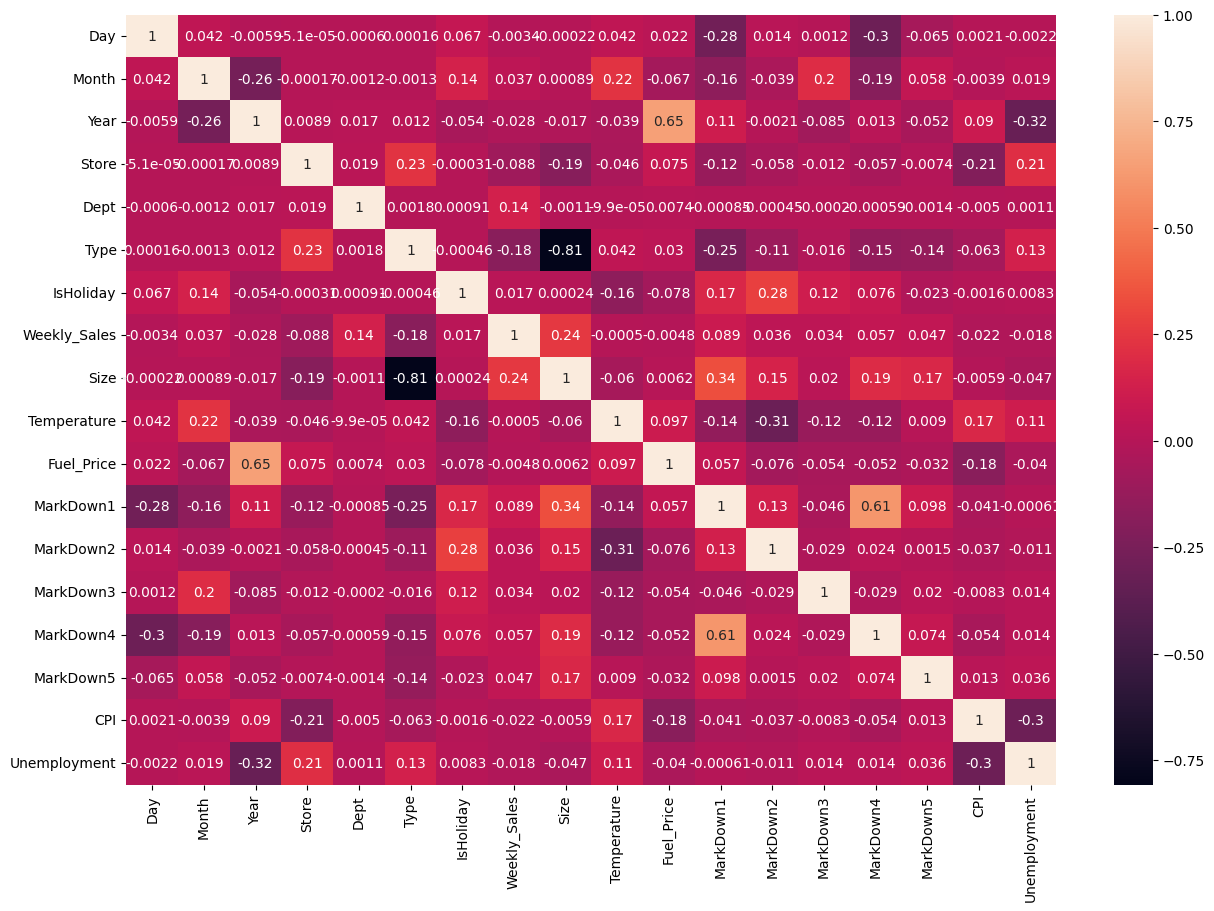

In [ ]:
plt.figure(figsize=(15,10))
sn.heatmap(df.corr(),annot=True)
plt.show()

**Summary stats**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Day,551479.0,15.653488,8.776044,1.000,8.000000,16.00000,23.000000,31.000000
Month,551479.0,6.277180,3.340134,1.000,3.000000,6.00000,9.000000,12.000000
Year,551479.0,2011.392758,1.054086,2010.000,2010.000000,2011.00000,2012.000000,2013.000000
Store,551479.0,22.270485,12.796872,1.000,11.000000,22.00000,33.000000,45.000000
Dept,551479.0,44.603013,30.416079,1.000,19.000000,38.00000,74.000000,99.000000
Type,551479.0,1.594791,0.669624,1.000,1.000000,1.00000,2.000000,3.000000
IsHoliday,551479.0,0.071905,0.258330,0.000,0.000000,0.00000,0.000000,1.000000
Weekly_Sales,551479.0,15690.898242,22784.038887,1.000,1813.358750,7246.31000,19819.607100,693099.360000
Size,551479.0,136073.691863,61207.331445,34875.000,93638.000000,128107.00000,202505.000000,219622.000000
Temperature,551479.0,58.703624,18.685408,-7.290,45.160000,59.94000,73.160000,101.950000


# **Final_Cleaned_datasets**

In [ ]:
df

,Day,Month,Year,Store,Dept,Type,IsHoliday,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,5,2,2010,1,1,1,0,24924.5000,151315,42.31,2.572,6375.9129,3579.21,137.9309,32403.87,6965.516,211.096358,8.106
1,5,2,2010,1,2,1,0,50605.2700,151315,42.31,2.572,6375.9129,3579.21,137.9309,32403.87,6965.516,211.096358,8.106
2,5,2,2010,1,3,1,0,13740.1200,151315,42.31,2.572,6375.9129,3579.21,137.9309,32403.87,6965.516,211.096358,8.106
3,5,2,2010,1,4,1,0,39954.0400,151315,42.31,2.572,6375.9129,3579.21,137.9309,32403.87,6965.516,211.096358,8.106
4,5,2,2010,1,5,1,0,32229.3800,151315,42.31,2.572,6375.9129,3579.21,137.9309,32403.87,6965.516,211.096358,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,0,3595.6713,118221,76.06,3.804,212.0200,851.73,4.7000,10.88,1864.570,193.589304,8.684
551475,26,7,2013,45,95,2,0,57110.5000,118221,76.06,3.804,212.0200,851.73,4.7000,10.88,1864.570,193.589304,8.684
551476,26,7,2013,45,96,2,0,189.0550,118221,76.06,3.804,212.0200,851.73,4.7000,10.88,1864.570,193.589304,8.684
551477,26,7,2013,45,97,2,0,6751.9026,118221,76.06,3.804,212.0200,851.73,4.7000,10.88,1864.570,193.589304,8.684


In [ ]:
df.dtypes

Day               int64
Month             int64
Year              int64
Store             int64
Dept              int64
Type              int64
IsHoliday         int64
Weekly_Sales    float64
Size              int64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
dtype: object

In [ ]:
df.to_csv('Cleaned_Dataset.csv',index=False)

                                                                   END